# The soil production function

This lesson produced by Simon M Mudd and Fiona J Clubb. Last update (13/09/2021)

Back in the late 1800s, people (including G.K. Gilbert) we speculating about the rates at which soil was formed. This might depend on things like the number of burrowing animals, the rocky type, the number of plants, and other factors. 

The soil is "produced" from somewhere, and usually it is produced from some combination of conversion of rock to sediments, addition of organic matter, and deposition of dust. But we are going to focus on the conversion of rock material to sediment that can move. 

Gilbert suggested that the rate soil was produced (from underlying rocks) depended on the thickness of the soil. We can make a predition about the relationship between soil thickness and the rate soil is produced, and we call this the *soil production function*.

This function has proposed to have a few different forms, which we will explore below. 

## Exponential Soil Production

In lectures we identified that the rate of weathering on a hillslope could be described as an exponential function that depends on soil depth, with weathering rates declining as soil gets deeper (Heimsath et al., 1997):

$p = W_0 e^{-\frac{h}{\gamma}}$

where $W_0$ is the soil production rate with no soil, and $\gamma$ is a length scale that determines how quickly soil production falls off with depth.

Typical values for $W_0$ are in the range 0.01-1 mm/yr [(Perron, 2017)](http://www.annualreviews.org/doi/abs/10.1146/annurev-earth-060614-105405). Note that when you're doing numerical calculations you have to be consistent with units. We will always do calculations in length units of ***metres*** (m), time units of ***years*** (y) and mass units of ***kilograms*** (kg). However we might convert to other units for the purposes of plotting sensible numbers (e.g. Weathering rates in mm/y = m/y $\times$ 1000).

Let's take a look at what this function looks like by plotting it with python:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
h_locs = np.arange(0,2,0.1)

We define the soil production function:

In [5]:
def soil_prod_function(h_locs, W_0 = 0.0001, gamma = 0.4):
    P = np.multiply(W_0,  np.exp( - np.divide(h_locs,gamma)  )  )
    return P

Now lets plot the function and see what it looks like

<Figure size 720x216 with 0 Axes>

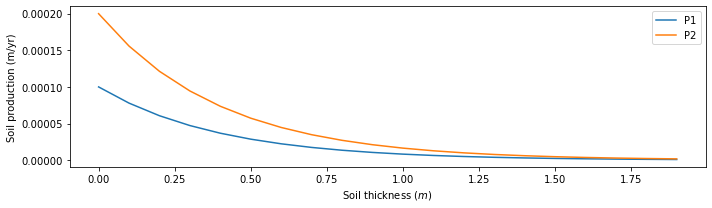

In [6]:
plt.rcParams['figure.figsize'] = [10, 3]
plt.clf()

W_0 = 0.0001
gamma = 0.4

W_02 = 0.0002
gamma2 = 0.4


P = soil_prod_function(h_locs, W_0 = W_0, gamma = gamma)
P2 = soil_prod_function(h_locs, W_0 = W_02, gamma = gamma2)

# print(P)

f, ax = plt.subplots(1, 1)
ax.plot(h_locs, P,label="P1")
ax.plot(h_locs, P2,label="P2")


ax.set_xlabel("Soil thickness ($m$)")
ax.set_ylabel("Soil production (m/yr)")

ax.legend()
plt.tight_layout()

## The peaked soil production function

We also discussed in the lecture an alternative way in which soil may be produced: where there are very slow rates of soil production where there is bare bedrock, then soil peaks at some intermediate thickness before decreasing exponentially with increasing soil thickness. This model dates back to Gilbert (1877), and makes intuitive sense: water is needed for weathering processes as we discussed today. If there is bare bedrock, water is quickly transported through overland flow and little weathering can take place. If there is too much soil, then it's unlikely to be fully saturated down to the bedrock--soil interface.

In this section, we will make some plots of a hypothetical peaked (or humped) soil production function.

We will use the theoretical formulation from [Cox (1980)](https://onlinelibrary.wiley.com/doi/abs/10.1002/esp.3760050305) to calculate the weathering rate for a range of soil depths. This is a bit more complicated than the exponential function and has a bigger range of parameters:

\begin{equation}
W = W_0 (\alpha e^{-kh}) + (1 - \alpha)f \\
f = \Bigg(1 + c\frac{h}{h_c} - \frac{h^2}{{h_c}^2}\Bigg)
\end{equation}

You should recognise some of these parameters from the exponential equation. The first part of the equation is the exponential function multiplied by a coefficient, $\alpha$. $W$ is still the weathering rate, $W_0$ is the inital rate of soil production where there is no soil, and $h$ is soil depth. There are two new parameters: $h_c$ is a critical soil depth (m), and $c$ is an empirical constant. Anhert (1977) suggests that $c$ might vary between 1.7 - 2.3, $h_c$ might vary between 0.6 - 1.5, and $\alpha$ between 0 - 1. If $\alpha = 1$, then the relationship is simply the exponential function.

<Figure size 720x216 with 0 Axes>

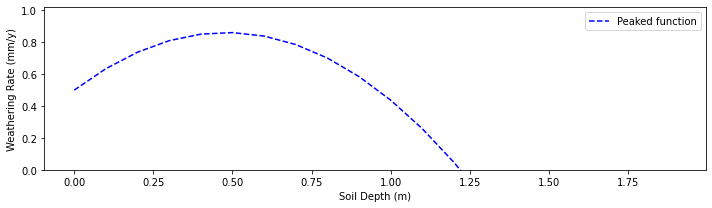

In [11]:
# first, let's clear the original figure
plt.clf()
# make a new figure
fig, ax = plt.subplots()


k = 1

# define the critical depth for soil production
h_c = 0.5 #metres

# define the initial rate of soil production 
W_0 = 0.0005 #m/year

# define the constant c
c = 2 #dimensionless

# define alpha
alpha = 0.2

# calculate the weathering rate for the range of soil depths, h
f = (1 + c*(h_locs/h_c) - h_locs**2/h_c**2)
W = W_0 * (alpha * np.exp(-k*h_locs) + (1 - alpha)*f)

# plot the new result with a blue dashed line
ax.plot(h_locs,W*1000.,'--', color='blue', label = 'Peaked function')

# add a legend 
plt.legend(loc = 'upper right')

# set the y limit of the humped function to 0 (so we don't get negative weathering rates), and set the axis labels
ax.set_ylim(0,)
plt.xlabel("Soil Depth (m)")
plt.ylabel("Weathering Rate (mm/y)")
plt.tight_layout()

Exercise 1
---

1. Have a play around and try to change some of the parameters in the peaked function (simply modify in the code block above). How does this affect the curve?

2. Try to make a plot with the exponential and peaked functions on the same set of axes, so you can compare them (HINT - copy the line that creates the exponential soil production function into the code block above, and  then give it a different colour).

---

---
## Exercise 2
<p>Create a figure from the practical today that shows the difference between the peaked and exponential soil production functions for different initial soil production rates. You should write a figure caption that annotates what your soil production plot is showing. The caption should be a paragraph of text that describes each line, and the parameters that have been used to create them, and offers a brief explanation of how the parameters used influence rates of soil production. For an indication of the level of detail required, you could look at examples of captions to figures in journal articles, such as Figure 3 in  
[Heimsath et al. (2012)](https://www.nature.com/ngeo/journal/v5/n3/pdf/ngeo1380.pdf). You can use any program you like, such as Microsoft Word, to create your figure.

**Note**: the exercises from the practicals in this module will not be marked, but they are all teaching you important skills that will be used in the summative assessment. I would therefore really encourage you to engage with them. I will go over the answers and discuss the exercises at the start of the next session.

For your independent project, you will be expected to present 5 figures with captions, so this is a good chance to practice how to write a good figure caption!